<a href="https://colab.research.google.com/github/alexgualberto/HeartDisease_Classification/blob/main/HeartDisease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Classificação: Previsão de Doença Cardíaca
## Autor: Alexandre dos Santos Gualberto

---

O objetivo deste projeto é utilizar técnicas de aprendizado de máquina para classificar e prever se um paciente tem ou não doença cardíaca.

### Conjunto de Dados
O conjunto de dados utilizado neste projeto é o [Heart Failure Prediction](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction), disponível no Kaggle. Este conjunto de dados contém informações clínicas e de saúde de pacientes, bem como a indicação de se eles têm ou não doença cardíaca.



### Atributos do Conjunto de Dados

1. **Age (Idade)**: Idade do paciente em anos.

2. **Sexo**: Sexo do paciente, representado por "M" para masculino e "F" para feminino.

3. **Tipo de Dor no Peito (ChestPainType)**: Descreve o tipo de dor no peito relatada pelo paciente, com as seguintes categorias:
   - TA (Angina Típica): Angina típica é uma sensação de dor ou desconforto no peito que geralmente ocorre quando há uma redução do fluxo sanguíneo para o coração.
   - ATA (Angina Atípica): Angina atípica é uma forma de dor no peito que não é considerada típica de angina, mas pode ainda estar relacionada a problemas cardíacos.
   - NAP (Dor Não Anginosa): Dor no peito que não é causada por falta de fluxo sanguíneo para o coração.
   - ASY (Assintomático): Ausência de sintomas de dor no peito.

4. **Pressão Arterial de Repouso (RestingBP)**: Pressão arterial em repouso medida em milímetros de mercúrio (mm Hg).

5. **Colesterol**: Nível de colesterol sérico medido em miligramas por decilitro (mg/dl).

6. **Açúcar no Sangue em Jejum (FastingBS)**: Açúcar no sangue em jejum, onde 1 indica que o açúcar no sangue em jejum é superior a 120 mg/dl e 0 indica o contrário.

7. **ECG de Repouso (RestingECG)**: Resultados do eletrocardiograma (ECG) em repouso, com as seguintes categorias:
   - Normal: Resultado do ECG normal.
   - ST: Apresenta anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST em mais de 0,05 mV).
   - LVH (HVE): Indica provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes.

8. **Frequência Cardíaca Máxima Alcançada (MaxHR)**: Frequência cardíaca máxima atingida durante o teste de esforço.

9. **Angina Induzida por Exercício (ExerciseAngina)**: Indica se o paciente experimentou angina induzida por exercício, onde "Y" significa sim e "N" significa não.

10. **Oldpeak**: Representa a depressão do segmento ST induzida pelo exercício, medida numericamente.

11. **Inclinação do Segmento ST (ST_Slope)**: Descreve a inclinação do segmento ST durante o pico do exercício, com as seguintes categorias:
    - Up: Inclinação ascendente.
    - Flat: Inclinação plana.
    - Down: Inclinação descendente.

12. **Doença Cardíaca (HeartDisease)**: Classe de saída do modelo, onde 1 indica presença de doença cardíaca e 0 indica condição normal.


In [150]:
import pandas as pd

data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [151]:
# informações gerais sobre o conjunto de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [152]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [153]:
# Verifica os dados replicados
data.duplicated().sum()

0

In [154]:
# Calcula as estatísticas descritivas das variáveis numéricas
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Chama a atenção o fato de alguns pacientes possuírem "Cholesterol" e "RestingBP" iguais a zero, isso deve ser investigado.

<ipython-input-155-bc2c8e7d48b0>:4: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



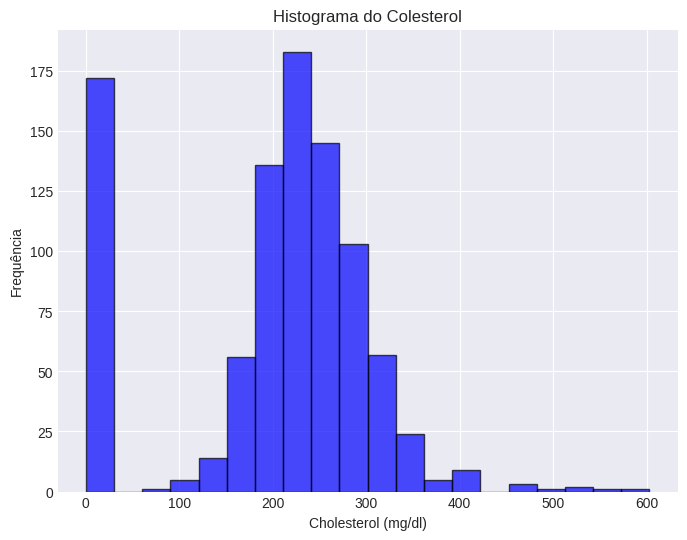

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')

# Plotar o histograma para o colesterol (Cholesterol)
plt.figure(figsize=(8, 6))
plt.hist(data['Cholesterol'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histograma do Colesterol')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequência')
plt.show()

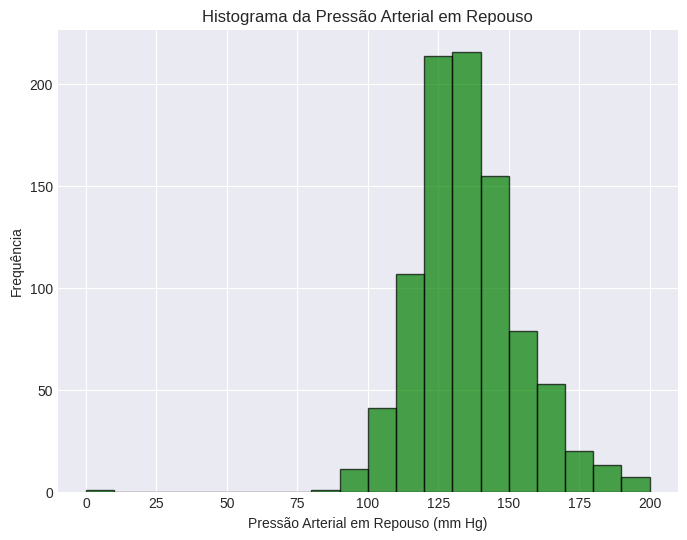

In [156]:
plt.figure(figsize=(8, 6))
plt.hist(data['RestingBP'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title('Histograma da Pressão Arterial em Repouso')
plt.xlabel('Pressão Arterial em Repouso (mm Hg)')
plt.ylabel('Frequência')
plt.show()

Para tratar esse problema, que é mais agudo no atributo "Cholesterol", será trocado os valores 0 pela mediana do atributo.

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= 0 , strategy='median')
imputer = imputer.fit(data[['Cholesterol']])
data['Cholesterol'] = imputer.transform(data[['Cholesterol']])

imputer = imputer.fit(data[['RestingBP']])
data['RestingBP'] = imputer.transform(data[['RestingBP']])

### **Análise dos Dados**
- Nesta seção, vamos explorar os dados para entender como estão distribuídos e investigar as possíveis relações entre os atributos e a ocorrência de doença cardíaca.

- Vamos começar examinando a distribuição de alguns atributos-chave, como idade, colesterol, pressão arterial em repouso, entre outros. Essa análise nos dará insights sobre como esses atributos estão distribuídos em nossa amostra.



<ipython-input-71-fe0a0ffe920b>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



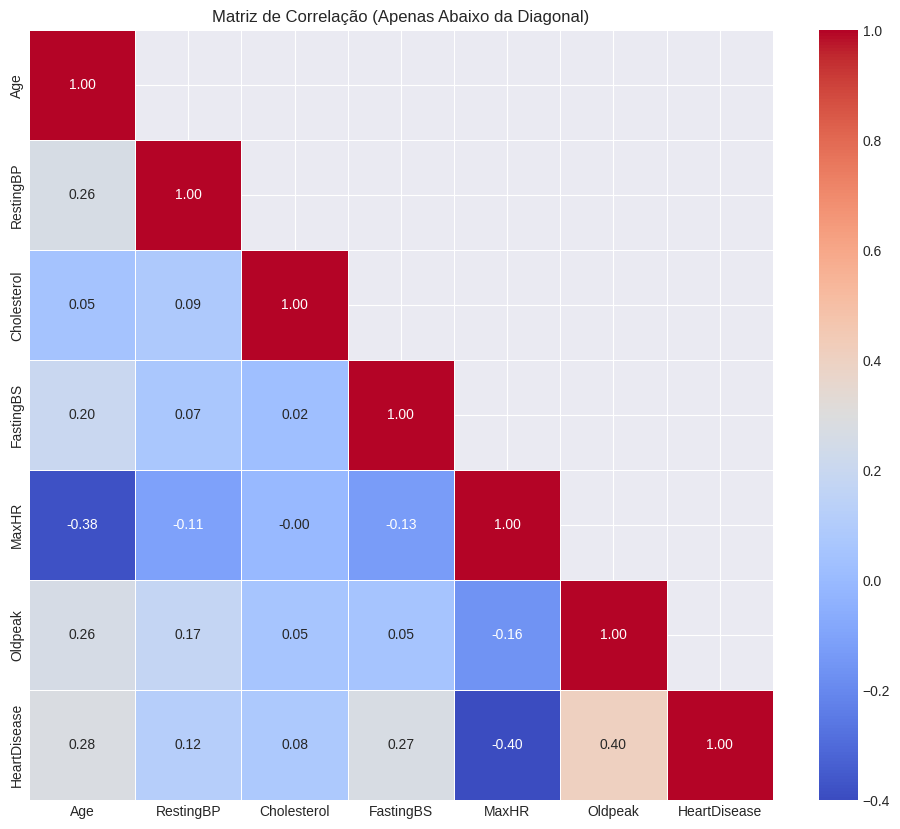

In [71]:
import numpy as np

correlacao = data.corr()

mascara = np.triu(np.ones_like(correlacao, dtype=bool), k=1)

plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, mask=mascara)

plt.title('Matriz de Correlação (Apenas Abaixo da Diagonal)')

plt.show()

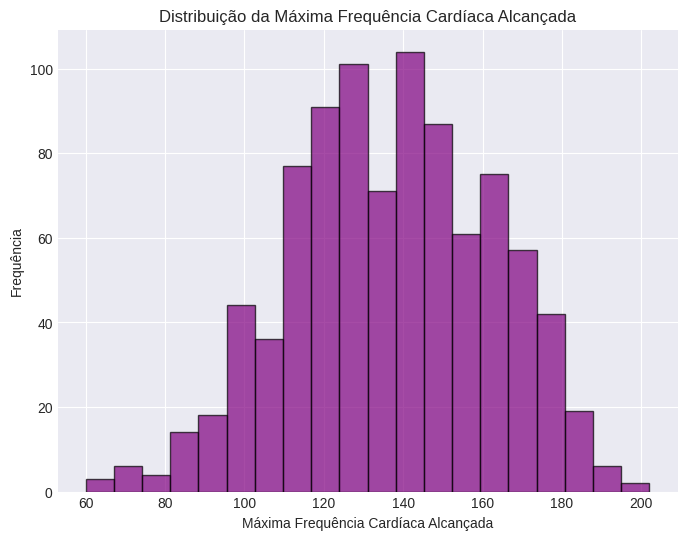

In [77]:
plt.figure(figsize=(8, 6))
plt.hist(data['MaxHR'], bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribuição da Máxima Frequência Cardíaca Alcançada')
plt.xlabel('Máxima Frequência Cardíaca Alcançada')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

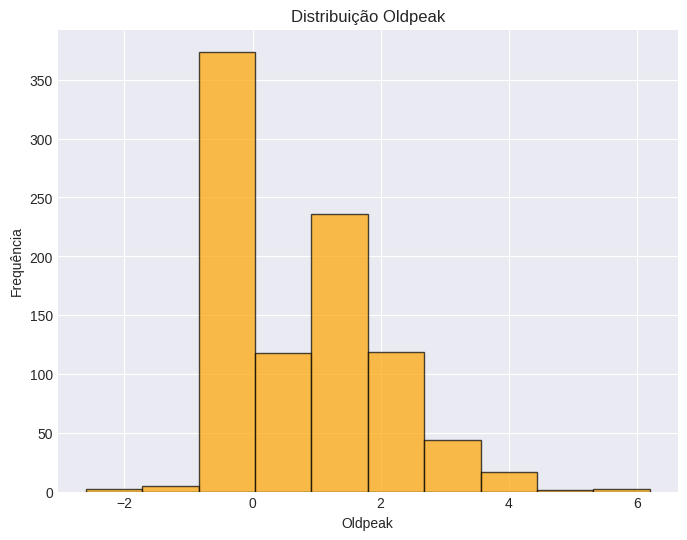

In [97]:
plt.figure(figsize=(8, 6))
plt.hist(data['Oldpeak'], bins=10, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribuição Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [157]:
!pip install plotly.express

In [84]:
import plotly.express as px

# Calcular a porcentagem de ocorrências de cada valor de açúcar no sangue em repouso
porcentagem_fastingBS = (data['FastingBS'].value_counts() / len(data)) * 100

fig = px.bar(x=data['FastingBS'].value_counts().index,
             y=data['FastingBS'].value_counts().values,
             color=data['FastingBS'].value_counts().index,
             title="Distribuição de Açúcar no Sangue em Repouso",
             labels={'x': 'Açúcar no Sangue em Repouso', 'y': 'Frequência'},
             text=porcentagem_fastingBS.round(2), width=700, height=600)

fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside')
fig.update_layout(title_x=0.5, yaxis_title='Frequência', xaxis_title='Açúcar no Sangue em Repouso', showlegend=False)
fig.update_yaxes(tickformat=",d")
fig.show()

In [89]:
# Verifica a distribuição da doença cardiaca com relação ao sexo
fig = px.histogram(data, x=data['HeartDisease'], color='FastingBS', title="Distribuicao de doença cardiaca em relação ao açúcar no sangue em repouso", barmode="group", width=700, height=600)
fig.update_layout(title_x=0.5, yaxis_title='Quantidade', xaxis_title='Açúcar no Sangue em Repouso')
fig.show()

In [29]:
# Mostra a porcentagem de homens e mulheres
fig = px.pie(data, names='Sex', title='Porcentagem de homens e relação a mulheres', width=700, height=600)
fig.update_layout(legend_title='Sex', title_x=0.5)
fig.show()

In [86]:
# Verifica a distribuição da doença cardiaca com relação ao sexo
fig = px.histogram(data, x=data['HeartDisease'], color='Sex', title="Distribuicao de doença cardiaca em relação ao sexo", barmode="group", width=700, height=600)
fig.update_layout(title_x=0.5, yaxis_title='Quantidade', xaxis_title='Doença cardiaca')
fig.show()

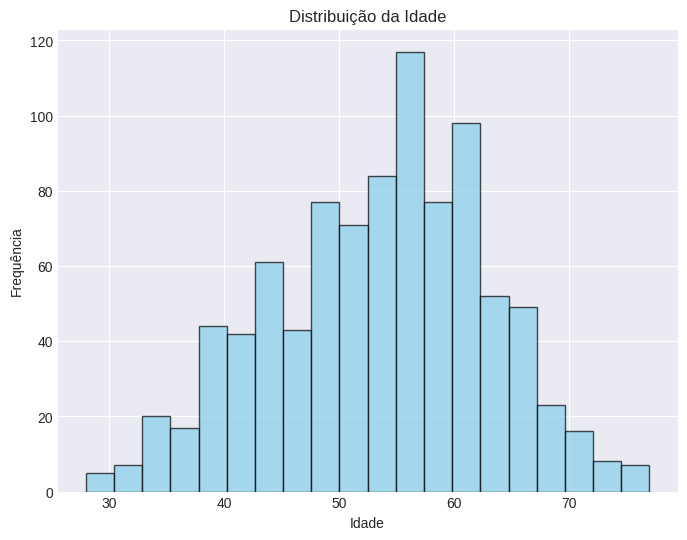

In [66]:


# Plotar o histograma da idade
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


In [42]:
porcentagem_dor_peito = (data['ChestPainType'].value_counts() / len(data)) * 100

# Criar o gráfico de barras com cores diferentes para cada tipo de dor no peito
fig = px.bar(data, x=data['ChestPainType'].value_counts().index, y=data['ChestPainType'].value_counts().values,
             color=data['ChestPainType'].value_counts().index, title="Distribuição dos Tipos de Dor no Peito",
             labels={'x': 'Tipo de Dor no Peito', 'y': 'Frequência'}, text=porcentagem_dor_peito.round(2),
             width=700, height=600)
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside')
fig.update_layout(title_x=0.5, yaxis_title='Frequência', xaxis_title='Tipo de Dor no Peito', showlegend=False)
fig.show()

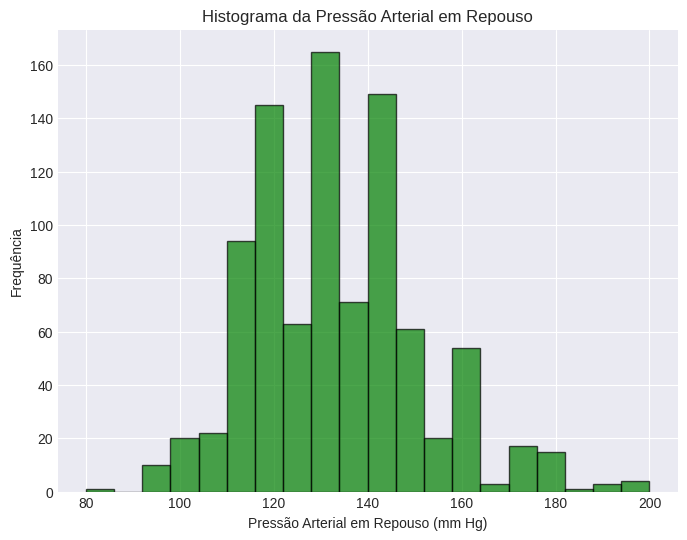

In [53]:
plt.figure(figsize=(8, 6))
plt.hist(data['RestingBP'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title('Histograma da Pressão Arterial em Repouso')
plt.xlabel('Pressão Arterial em Repouso (mm Hg)')
plt.ylabel('Frequência')
plt.show()

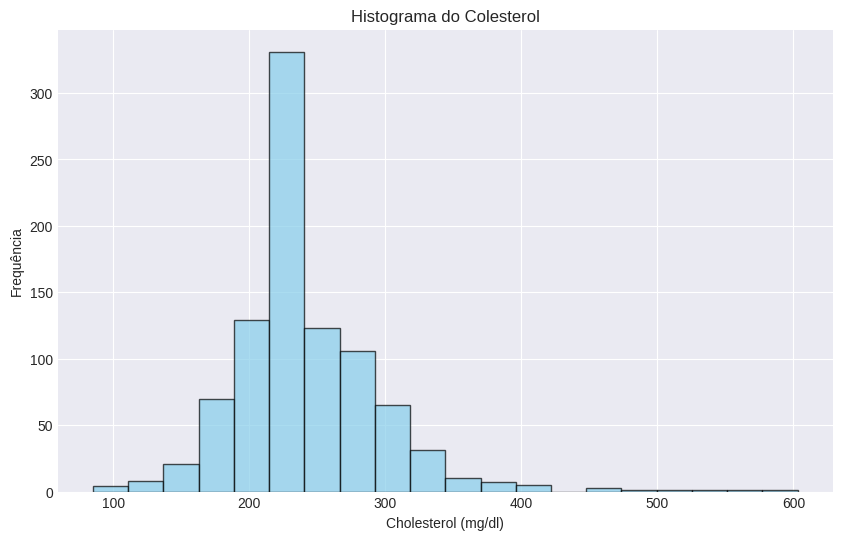

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(data['Cholesterol'], bins=20, color='skyblue', edgecolor='black',  alpha=0.7)

plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequência')
plt.title('Histograma do Colesterol')
plt.show()

<ipython-input-64-a4839a04d94c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




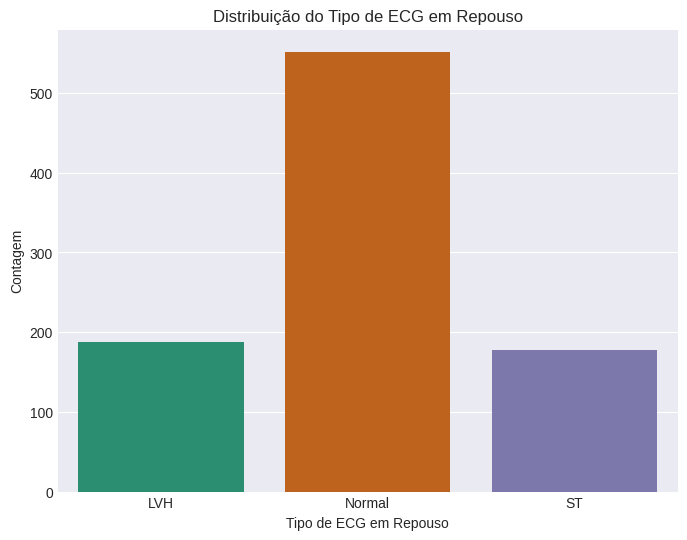

In [64]:
grouped_data = data.groupby('RestingECG').size()

plt.figure(figsize=(8, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values, palette="Dark2")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Tipo de ECG em Repouso')
plt.ylabel('Contagem')
plt.title('Distribuição do Tipo de ECG em Repouso')

plt.show()

####  Conclusões da Análise de Dados

Após analisar os dados, várias conclusões podem ser destacadas:

* Correlações significativas:
  - Observamos uma correlação positiva entre o atributo Oldpeak e a ocorrência de doença cardíaca. Isso sugere que um aumento na depressão do segmento ST durante o exercício (indicado pelo Oldpeak) está associado a uma maior probabilidade de doença cardíaca.
  - Também encontramos uma correlação negativa entre a máxima frequência cardíaca alcançada (MaxHR) e a doença cardíaca. Isso indica que uma maior máxima frequência cardíaca alcançada está associada a uma menor probabilidade de doença cardíaca.
* Correlações menos expressivas:

  - Embora menos expressivas, observamos correlações entre a idade (Age) e a ocorrência de doença cardíaca, assim como com o nível de açúcar no sangue em repouso (FastingBS).
* Desbalanceamento de dados:

  - Notamos um desbalanceamento significativo nos dados em relação ao sexo, onde cerca de 79% dos pacientes são homens. Além disso, os homens representam aproximadamente 90% dos pacientes diagnosticados com doenças cardíacas. Esse desbalanceamento pode impactar as análises e modelagem subsequente, sugerindo a necessidade de estratégias de balanceamento de dados.
* Discrepâncias no atributo colesterol:

  - O atributo Cholesterol apresenta números discrepantes, evidenciados pelo desvio padrão considerável (aproximadamente 100) e pelo valor máximo (603) muito distante da média (aproximadamente 198.80). Isso pode indicar a presença de outliers ou a necessidade de mais investigações sobre a distribuição desse atributo.
  -  Após pesquisar sobre esse números anormais, encontrei a doença hipercolesterolemia familiar evidenciando que esses dados são possíveis e, portanto, serão deixados no dataset.Os indivíduos com forma homozigótica da Hipercolesterolemia Familiar tendem a ter colesterol acima de 600 mg/dl e sofrem doenças de cardíacas já na primeira década da vida.
* Tipos de dor no peito:

  - Cerca de 54% dos pacientes apresentaram tipos de dor no peito assintomáticas (ASY). Essa informação é relevante para compreender os sintomas associados à doença cardíaca e pode ser útil na triagem e diagnóstico.


### **Classificação**

- Nesta seção, estaremos utilizando técnicas de classificação para treinar modelos preditivos e, posteriormente, avaliar o desempenho desses modelos. A classificação é uma tarefa fundamental em aprendizado de máquina, onde o objetivo é atribuir uma classe ou categoria a cada instância de dados com base em suas características.

-  Ao longo desta etapa, exploraremos diferentes algoritmos de classificação, ajustaremos seus hiperparâmetros para otimizar o desempenho e avaliaremos sua capacidade de generalização em dados não vistos. Através deste processo, buscamos identificar o modelo mais adequado para prever com precisão a ocorrência de doença cardíaca com base nos atributos disponíveis em nosso conjunto de dados.


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

**Pré Processamento**

In [107]:
# Separando as características em numéricas e categóricas
numeric_features = ['RestingBP', 'FastingBS', 'MaxHR', 'Oldpeak', 'Cholesterol', 'Age']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Construindo os pipelines para pré-processamento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinando os pipelines usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

**Split dos dados**

In [108]:
X = data.iloc[:,0:11]
y = data.iloc[:,11]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [145]:
# Vetor com os modelos a serem utilizados no treinamento
modelos = [
    LogisticRegression(max_iter = 100, C = 0.1),
    SVC(),
    GaussianNB(),
    RandomForestClassifier(max_depth = 15, min_samples_leaf = 1, min_samples_split = 6, n_estimators = 849)
]

**Hyperparameter Tuning**

In [128]:
from sklearn.model_selection import  RandomizedSearchCV
from scipy.stats import randint

parametros_logistic_regression = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300]
}

parametros_svc = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

parametros_random_forest = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

modelos = [
    ('Logistic Regression', LogisticRegression(), parametros_logistic_regression),
    ('SVC', SVC(), parametros_svc),
    ('Random Forest', RandomForestClassifier(), parametros_random_forest)
]

for nome_modelo, modelo, parametros in modelos:
    search = RandomizedSearchCV(modelo, parametros, n_iter=100, cv=5, scoring='accuracy', random_state=0)

    search.fit(X_train_preprocessed, y_train)
    melhores_parametros = search.best_params_
    melhor_pontuacao = search.best_score_

    print(f"Modelo: {nome_modelo}")
    print(f"Melhores parâmetros: {melhores_parametros}")
    print(f"Melhor pontuação: {melhor_pontuacao:.2f}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 15 is smaller than n_iter=100. Running 15 iterations. For exhaustive searches, use GridSearchCV.



Modelo: Logistic Regression
Melhores parâmetros: {'max_iter': 100, 'C': 0.1}
Melhor pontuação: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.



Modelo: SVC
Melhores parâmetros: {'kernel': 'rbf', 'gamma': 'auto', 'C': 1}
Melhor pontuação: 0.86

Modelo: Random Forest
Melhores parâmetros: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 849}
Melhor pontuação: 0.87



**Cross Validation**

In [146]:
pipelines = []
pontuacoes = []

for modelo in modelos:
    # Calcula a pontuação de validação cruzada
    pipeline = make_pipeline(preprocessor, modelo)
    pipelines.append(pipeline)
    scores = cross_val_score(pipeline, X, y, cv=10)
    pontuacoes.append(scores)

# Exibir as pontuações de validação cruzada para cada modelo
for i, pipeline in enumerate(pipelines):
    print(f"Modelo {i+1}: {modelos[i].__class__.__name__}")
    print(f"Acurácia: {pontuacoes[i].mean():.2f} (+/- {pontuacoes[i].std() * 2:.2f})\n")

Modelo 1: LogisticRegression
Acurácia: 0.85 (+/- 0.12)

Modelo 2: SVC
Acurácia: 0.85 (+/- 0.13)

Modelo 3: GaussianNB
Acurácia: 0.84 (+/- 0.10)

Modelo 4: RandomForestClassifier
Acurácia: 0.85 (+/- 0.12)



**Model Evaluation**

Avaliando Logistic Regression:

Relatório de Classificação para Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



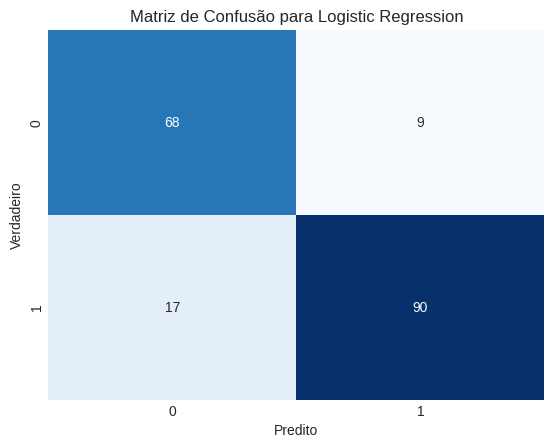

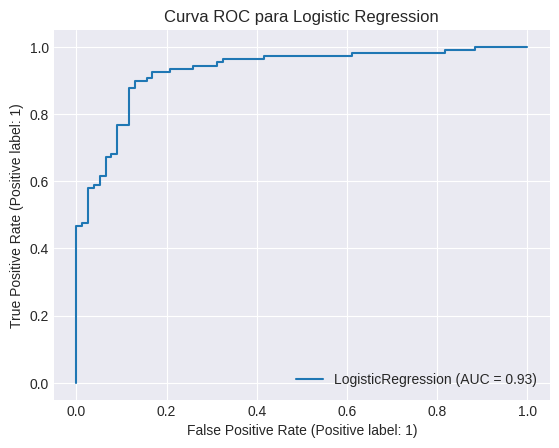




Avaliando SVC:

Relatório de Classificação para SVC:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        77
           1       0.87      0.86      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



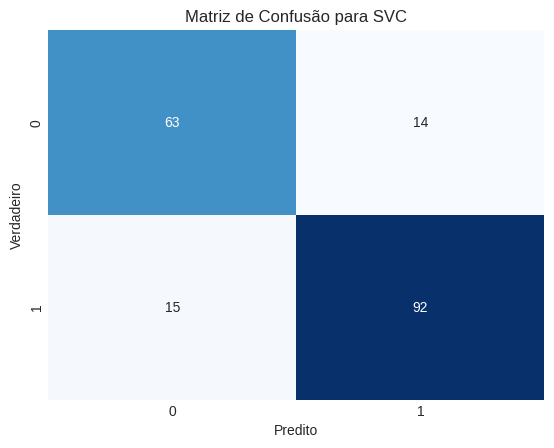

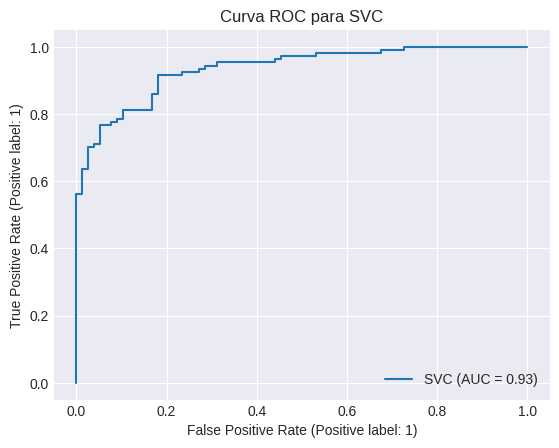




Avaliando Random Forest:

Relatório de Classificação para Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



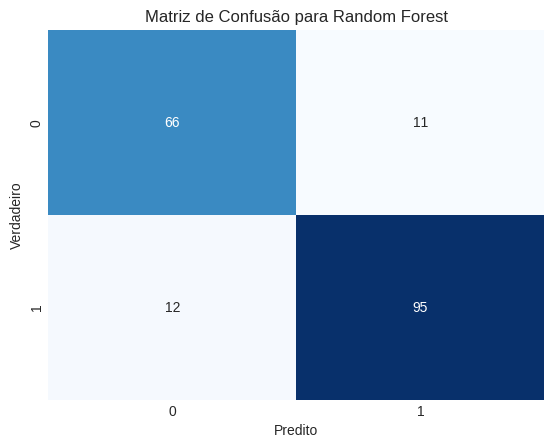

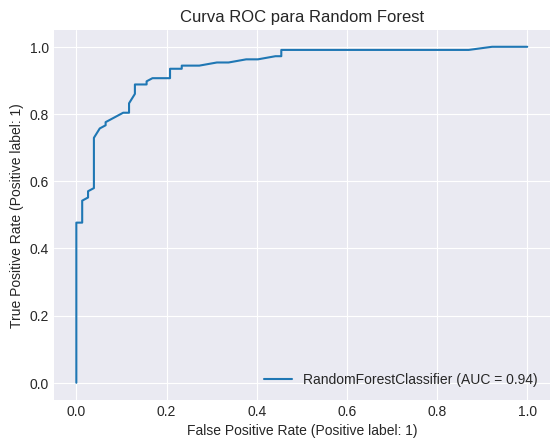

In [149]:
def avaliar_modelo(nome_modelo, modelo, X_teste, y_teste):
    # Fazer previsões
    y_pred = modelo.predict(X_teste)

    # Imprimir o relatório de classificação
    print(f"Relatório de Classificação para {nome_modelo}:")
    print(classification_report(y_teste, y_pred))

    # Calcular e plotar a matriz de confusão
    matriz_confusao = confusion_matrix(y_teste, y_pred)
    sns.heatmap(matriz_confusao, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f"Matriz de Confusão para {nome_modelo}")
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.show()

    RocCurveDisplay.from_estimator(modelo, X_teste, y_teste)
    plt.title(f'Curva ROC para {nome_modelo}')
    plt.show()

modelos_avaliacao = [
    ('Logistic Regression', LogisticRegression()),
    ('SVC', SVC()),
    ('Random Forest', RandomForestClassifier())
]

for nome_modelo, modelo in modelos_avaliacao:
    # Treinar o modelo
    modelo.fit(X_train_preprocessed, y_train)

    # Avaliar o modelo
    print(f"Avaliando {nome_modelo}:\n")
    avaliar_modelo(nome_modelo, modelo, X_test_preprocessed, y_test)
    print("\n\n")

#### **Análise de Desempenho**

#### **Logistic Regression:**
- **Precision (Precisão)**: 0.91 para a classe 1, indicando que 91% das instâncias previstas como positivas eram realmente positivas.
- **Recall (Revocação)**: 0.84 para a classe 1, indicando que o modelo identificou corretamente 84% das instâncias positivas.
- **F1-score**: 0.87 para a classe 1, uma métrica que leva em consideração tanto a precisão quanto a revocação.
- **Accuracy (Acurácia)**: 0.86, indicando a proporção de previsões corretas feitas pelo modelo.
- **ROC AUC**: 0.93, uma métrica que mede a capacidade do modelo de distinguir entre as classes. Um valor próximo de 1 indica um bom desempenho na classificação.

#### **SVC:**
- **Precision (Precisão)**: 0.87 para a classe 1, indicando que 87% das instâncias previstas como positivas eram realmente positivas.
- **Recall (Revocação)**: 0.86 para a classe 1, indicando que o modelo identificou corretamente 86% das instâncias positivas.
- **F1-score**: 0.86 para a classe 1, uma métrica que leva em consideração tanto a precisão quanto a revocação.
- **Accuracy (Acurácia)**: 0.84, indicando a proporção de previsões corretas feitas pelo modelo.
- **ROC AUC**: 0.93, uma métrica que mede a capacidade do modelo de distinguir entre as classes. Um valor próximo de 1 indica um bom desempenho na classificação.

#### **Random Forest:**
- **Precision (Precisão)**: 0.90 para a classe 1, indicando que 90% das instâncias previstas como positivas eram realmente positivas.
- **Recall (Revocação)**: 0.89 para a classe 1, indicando que o modelo identificou corretamente 89% das instâncias positivas.
- **F1-score**: 0.89 para a classe 1, uma métrica que leva em consideração tanto a precisão quanto a revocação.
- **Accuracy (Acurácia)**: 0.88, indicando a proporção de previsões corretas feitas pelo modelo.
- **ROC AUC**: 0.94, uma métrica que mede a capacidade do modelo de distinguir entre as classes. Um valor próximo de 1 indica um bom desempenho na classificação.

Considerando o contexto de previsão de possíveis doenças cardíacas, as métricas mais importantes são **Recall (Revocação)** e **ROC AUC**. Isso porque, como é crucial evitar falsos negativos, ou seja, classificar erroneamente um paciente que possui a doença como não tendo a doença. Um recall mais alto indica que o modelo está identificando mais corretamente os casos positivos. Além disso, uma área sob a curva ROC (ROC AUC) mais alta indica uma melhor capacidade do modelo de distinguir entre as classes positivas e negativas.

Por isso, neste caso o melhor desempenho obtido foi do modelo Random Forest que apresentou o melhor Recall e ROC AUC. Porém, vale destacar que a diferença de desempenho entre os modelos foi pequena.
